<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Deep-Learning-Tensorflow-Projects/blob/master/MNIST_using_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Libraries**

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


**Loading the Data**

```
The Fashion MNIST data is available directly in the tf.keras datasets API
```



In [0]:
mnist = tf.keras.datasets.mnist

**Training and Testing Split of Data**

```
Training = 60000 Samples
Testing = 10000 Samples
```



In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Training Image Size {}".format(training_images.shape))
print("Training Labels Size {}".format(training_labels.shape))
print("Test Image Size {}".format(test_images.shape))
print("Test Labels Size {}".format(test_labels.shape))

Training Image Size (60000, 28, 28)
Training Labels Size (60000,)
Test Image Size (10000, 28, 28)
Test Labels Size (10000,)


**Visualising the Data**

Image Label 0


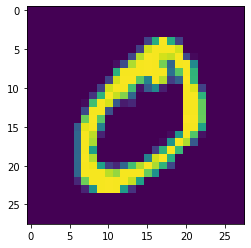

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print("Image Label {}".format(training_labels[1]))

**Normalizing the Data**

In [0]:
training_images = training_images/255.0
test_images = test_images/255.0

**Defining The Model and Compiling the Model**

In [0]:
# Defining the Model
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

# Defining the callbacks
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('loss') <= 0.01):
                print("\nReached 99% greater accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

# Compilin the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrices=['accuracy'])

**Fitting the Model**

In [18]:
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2014
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0799
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0539
Epoch 4/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0363
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0275
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0213
Epoch 7/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0175
Epoch 8/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0137
Epoch 9/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0122
Epoch 10/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0088
Reached 99% greater accuracy so cancelling training!
60000/60000 [============================